<a href="https://colab.research.google.com/github/divyakanojia/machinelearning/blob/main/lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ques. What is Regularization?**

Ans:
- Regularization is one of the ways to improve our model to work on unseen data by ignoring the less important features.
- Regularization minimizes the validation loss and tries to improve the accuracy of the model.
- It avoids overfitting by adding a penalty to the model with high variance, thereby shrinking the beta coefficients to zero.

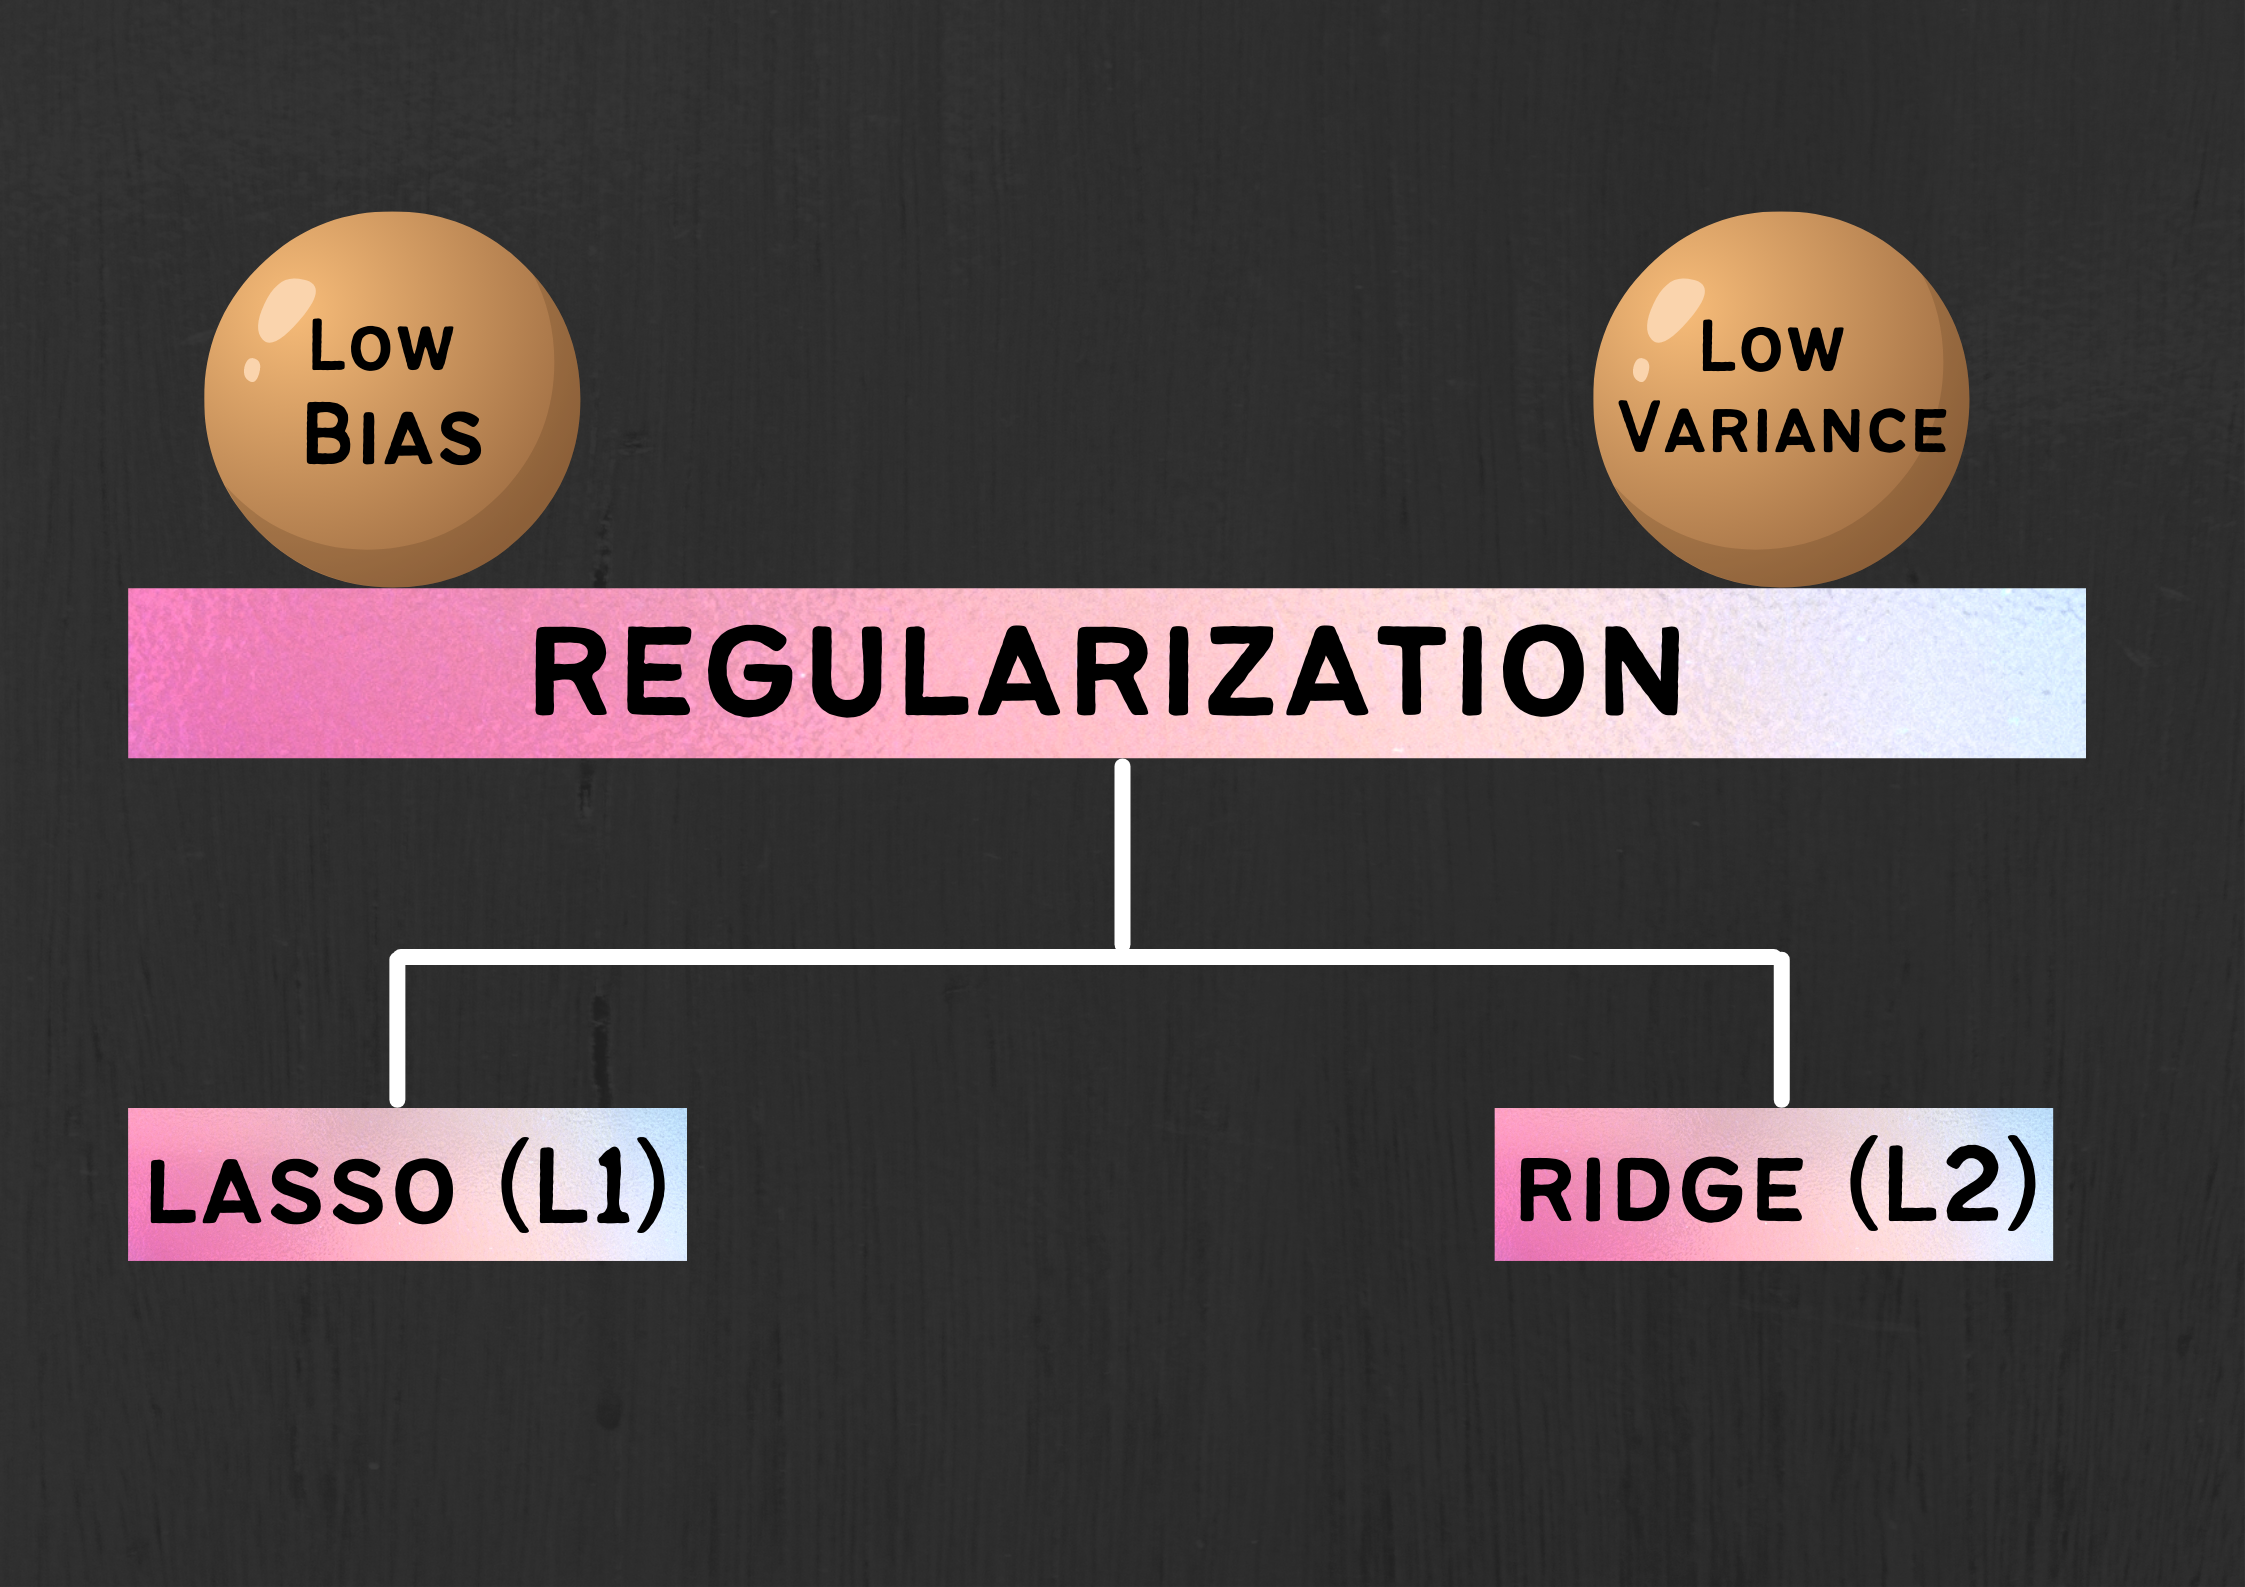

# **LASSO Regularization:**

LASSO stands for Least Absolute Shrinkable and Selection Operator. As mentioned in the regularization definition, it is the process of adding information to prevent the over-fitting problem, so a small modification will be done to the cost function of the ordinary least square as shown below.

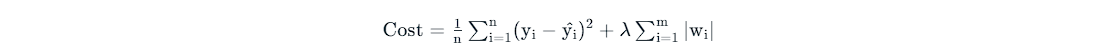

The next question we should ask is “what is λ?”. It is the regularization parameter which is a positive integer. If λ is too high, this will minimize or “shrink” the slope to zero. This is the main added value of LASSO. It can suppress the coefficients of useless features (highly correlated features) and hence, it makes the feature selection for our linear regression model. On the other hand, If λ is equal to zero, the loss function will turn into the “Ordinary Least Square” model. The regularization parameter (λ) can be determined by cross-validation in a way that avoids under-fitting (when λ is too high) and over-fitting (when λ is too low).


**In scikit-learn library "λ" is called "aplha".**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[26.43941934]
-2.5331087147574536


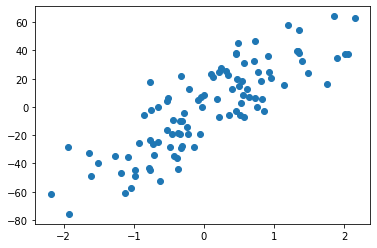

In [ ]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

<ipython-input-15-4d42e2fc29e6>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(X_train,y_train)
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10986.751769892318, tolerance: 7.248265404971567
  model = cd_fast.enet_coordinate_descent(


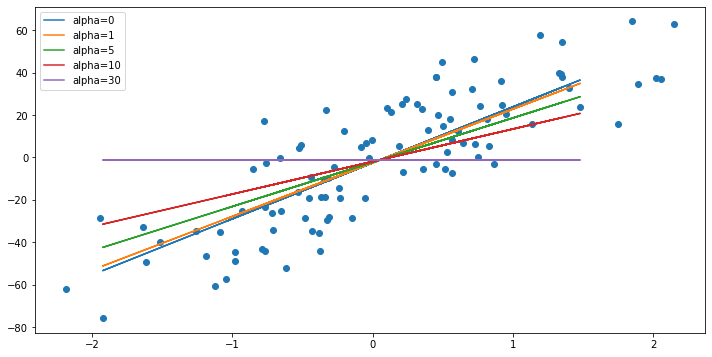

In [ ]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    L = Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_test,L.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()


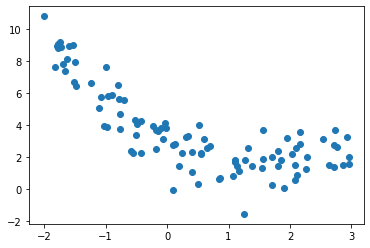

In [ ]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

C:\Users\91842\anaconda3\lib\site-packages\sklearn\pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.81683621641182, tolerance: 0.06499967674566547
  model = cd_fast.enet_coordinate_descent(
C:\Users\91842\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.0249

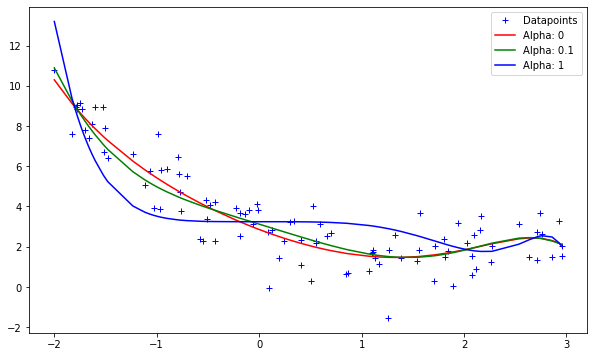

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()